In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_pickle('churn_final.pickle')

In [24]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [25]:
df.head()

,taxi_id_,w_,v_total_tips_count_1,v_mean_tips_count_1,v_total_tips_count_2,v_mean_tips_count_2,v_total_tips_count_3,v_mean_tips_count_3,v_total_tips_count_4,v_mean_tips_count_4,...,v_mean_trip_total_sum_4,v_pct_cc_1,v_pct_cc_2,v_pct_cc_3,v_pct_cc_4,v_mean_dias_activo_1,v_mean_dias_activo_2,v_mean_dias_activo_3,v_mean_dias_activo_4,y
0,96.0,4,161,161.0,289.0,144.5,442.0,147.333333,596.0,149.00,...,1867.2225,0.648891,0.638204,0.620989,0.599740,7.0,7.0,7.0,7.0,0
1,96.0,5,158,158.0,319.0,159.5,447.0,149.000000,600.0,150.00,...,1841.1525,0.544212,0.601349,0.607457,0.602491,7.0,7.0,7.0,7.0,0
2,96.0,6,176,176.0,334.0,167.0,495.0,165.000000,623.0,155.75,...,1892.5800,0.548710,0.546674,0.582686,0.590803,7.0,7.0,7.0,7.0,0
3,96.0,7,151,151.0,327.0,163.5,485.0,161.666667,646.0,161.50,...,1986.9775,0.563436,0.555615,0.552136,0.578097,7.0,7.0,7.0,7.0,0
4,96.0,8,163,163.0,314.0,157.0,490.0,163.333333,648.0,162.00,...,1982.9625,0.591537,0.578262,0.567962,0.562649,7.0,7.0,7.0,7.0,0


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
var = [v for v in df.columns if v[:2]=='v_']

In [28]:
X = df[var].copy()

In [29]:
sc = StandardScaler()

In [30]:
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
Xs.shape

(2987, 48)

In [34]:
Xs = pd.DataFrame(sc.transform(X),columns=var)

In [63]:
pca = PCA(n_components=3)

In [64]:
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [65]:
pca.explained_variance_

array([30.75372815,  6.2243995 ,  4.93666199])

In [66]:
pca.explained_variance_ratio_.cumsum()

array([0.64048803, 0.77011958, 0.87293225])

In [67]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2','p3'])

In [68]:
Xp.corr()

,p1,p2,p3
p1,1.000000e+00,2.279842e-14,-3.493044e-16
p2,2.279842e-14,1.000000e+00,-5.887686e-17
p3,-3.493044e-16,-5.887686e-17,1.000000e+00


In [69]:
Xp['y'] = df['y']

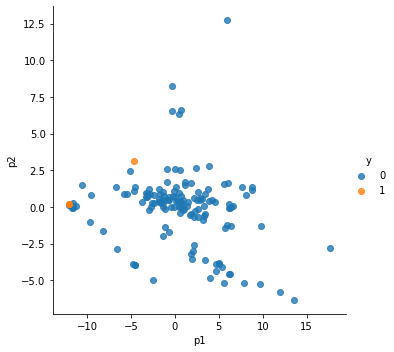

In [70]:
sns.lmplot(data=Xp.sample(frac=0.05),x='p1',y='p2',hue='y',fit_reg=False)

In [49]:
from sklearn.manifold import MDS

In [50]:
mds = MDS(n_components=2,n_jobs=-1)

In [51]:
Xm = pd.DataFrame(mds.fit_transform(X),columns=['d1','d2'])

In [52]:
Xm.shape

(2985, 2)

In [53]:
Xm['y'] = df['y']

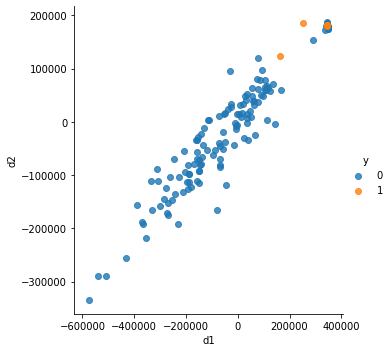

In [56]:
sns.lmplot(data=Xm.sample(frac=0.05),x='d1',y='d2',hue='y',fit_reg=False)

In [57]:
Xm.corr()

,d1,d2,y
d1,1.000000,0.952851,0.230415
d2,0.952851,1.000000,0.227187
y,0.230415,0.227187,1.000000


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score

In [75]:
modelo = LogisticRegression()

Xt,Xv,yt,yv = train_test_split(Xp[['p1','p2','p3']],Xp[['y']],train_size=0.7)

modelo.fit(Xt,yt)

print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.9192842912566096
0.9129047072330654
0.9684059358544759
0.9720982142857143


/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
modelo = LogisticRegression()

Xt,Xv,yt,yv = train_test_split(Xm[['d1','d2']],Xp[['y']],train_size=0.7)

modelo.fit(Xt,yt)

print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.8771228187359105
0.8266420717592593
0.5500239348970799
0.5535714285714286


/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
